# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import colors
import matplotlib.colors as mcolors
import warnings
from scipy import stats
import itertools
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# from catboost import CatBoostClassifier
# from numpy.random import RandomState

In [2]:
# Ignore notebook warnings to keep it clearer
warnings.filterwarnings('ignore')
# This is a magic function that renders the plot in the notebook itself.
%matplotlib inline 
# To see all the content in the column
pd.set_option('max_colwidth', 300)
# Setting options to display all rows and columns
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

# Data Exploration

In [3]:
train_df = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")

In [4]:
test_df = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv")

In [5]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# test_df.head()

In [7]:
train_df.shape

(614, 13)

In [8]:
test_df.shape

(367, 12)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

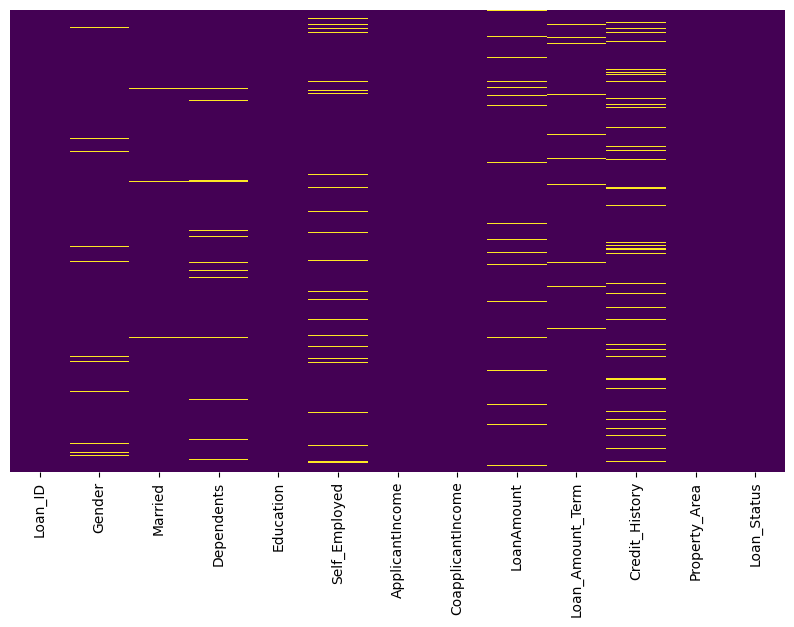

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Initial Pre-Processing

In [14]:
#Drop useless columns
train_df = train_df.drop('Loan_ID', axis=1)
test_df = test_df.drop('Loan_ID', axis=1)

In [15]:
#Convert Dependents to Numerical
train_df["Dependents"].mask(train_df["Dependents"] == '3+', 3, inplace=True)
train_df["Dependents"] = pd.to_numeric(train_df["Dependents"], errors='coerce')
test_df["Dependents"].mask(train_df["Dependents"] == '3+', 3, inplace=True)
test_df["Dependents"] = pd.to_numeric(train_df["Dependents"], errors='coerce')

In [16]:
# print("UNIQUE VALUES:\n")
# for col in train_df:
#     print(col)
#     print( len(train_df[col].unique()))
#     print( train_df[col].unique())

# Process numerical features

In [17]:
# create a variable to hold the names of the data types viz int16, in32 and so on
num_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Filter out variables with numeric data types
train_df_numcols = train_df.select_dtypes(include=num_cols)

### Checking Correlation

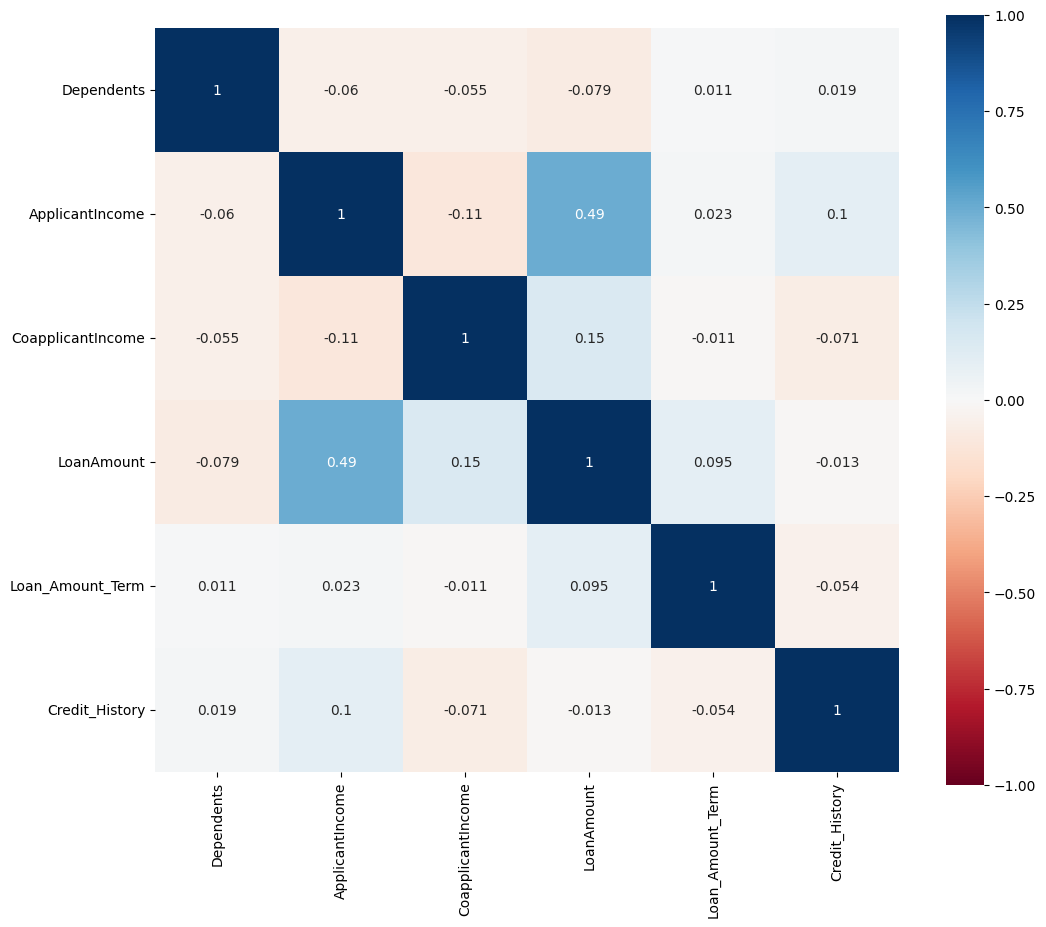

In [18]:
plt.figure(figsize = (12,10))
sns.heatmap(test_df[test_df.columns].corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

### Checking distribution for Skewness

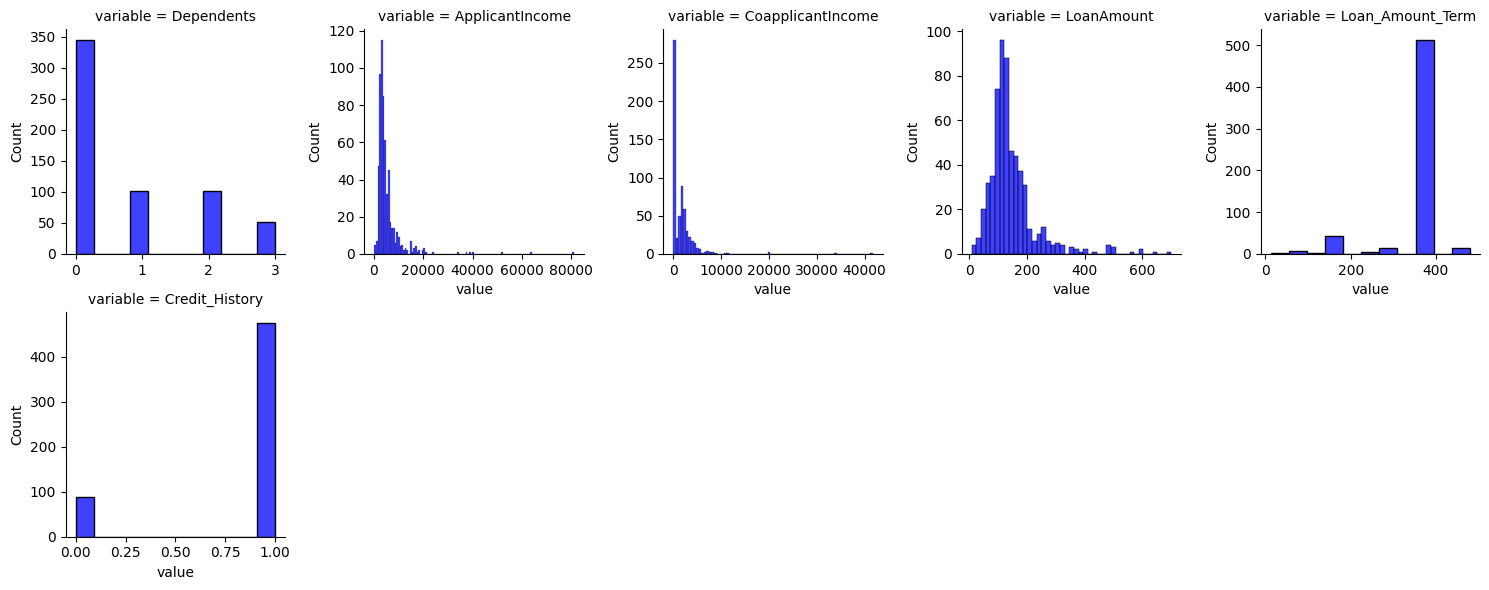

In [19]:
# Plot distributions of numerical variables. 
melt_num_features = pd.melt(train_df_numcols, 
                            value_vars=train_df_numcols.columns)
grid = sns.FacetGrid(melt_num_features, 
                     col="variable", 
                     col_wrap=5, 
                     sharex=False, 
                     sharey=False)
grid = grid.map(sns.histplot, 
                "value", 
                color="blue")

### I tried applying Log Transformation to the skewed features but the final scores obtained diminished 1%
So, I just commented it...

In [20]:
# #Log transformation
# features_to_transform = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']

# for feature in features_to_transform:
#     # Transforming features
#     aux_feature_column = train_df_numcols[feature]
#     plot , ax = plt.subplots(2 , 2 , figsize = (12 , 12))

#     g = sns.histplot(aux_feature_column, kde = True , ax = ax[0][0])

#     res = stats.probplot(aux_feature_column, plot= ax[1][0])
#     aux_feature_column = np.log1p(train_df_numcols[feature])

#     g = sns.histplot(aux_feature_column , kde = True , ax = ax[0][1])
#     res = stats.probplot(aux_feature_column, plot= ax[1][1])

#     train_df_numcols[feature] = train_df_numcols[feature].apply(np.log1p, inplace=True)

In [21]:
### Checking for outliers

In [22]:
# #To plot some selected features 
# #Setting up colors prefrences
# sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
# pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
# cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
# #Plotting following features
# To_Plot = train_df_numcols.columns
# print("Relative Plot Of Some Selected Features: A Data Subset")
# plt.figure()
# sns.pairplot(train_df_numcols[To_Plot], hue= "Credit_History",palette= (["#682F2F","#F3AB60"]))
# #Taking hue 
# plt.show()

### Imputaton for Numerical Columns

In [23]:
train_df.shape

(614, 12)

<AxesSubplot:>

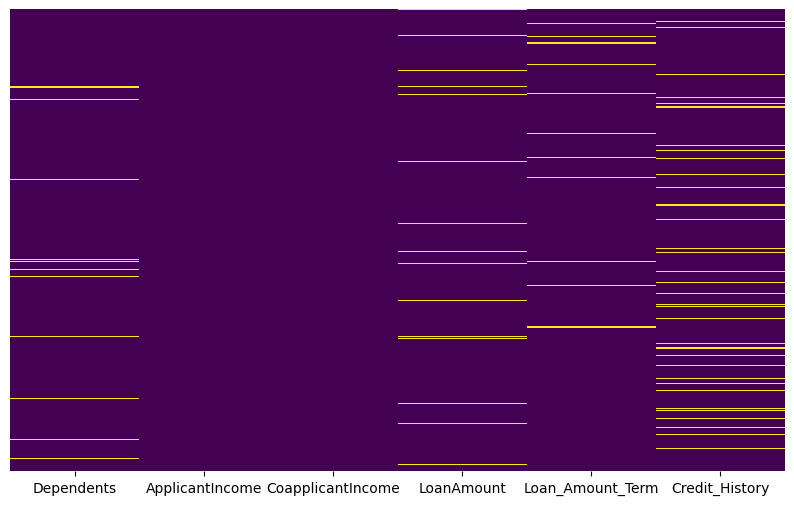

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df_numcols.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [25]:
numcols = train_df_numcols.columns.tolist()
imputer = KNNImputer(n_neighbors=3)
train_df_numcols=pd.DataFrame(imputer.fit_transform(train_df_numcols), columns =numcols)

<AxesSubplot:>

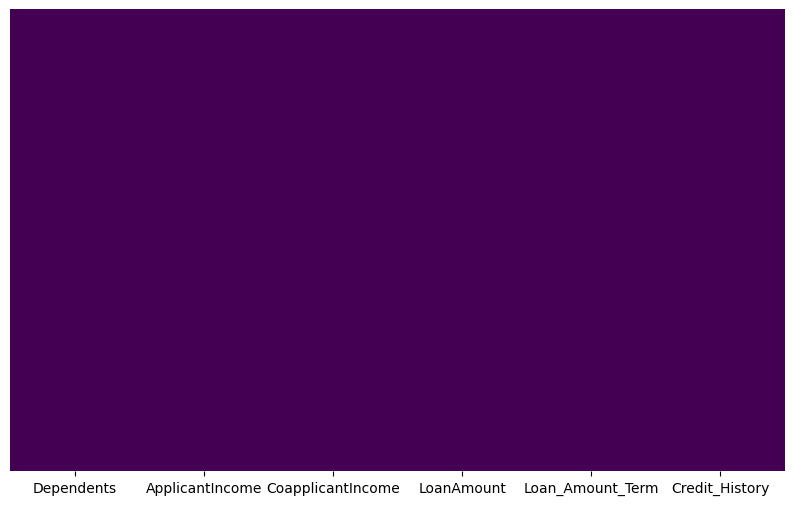

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df_numcols.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Normalization of Numerical Data

In [27]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

# Scaling down the numeric variables
# We exclude SalePrice using iloc() on train_numcols_only data frame
train_df_numcols = pd.DataFrame(min_max.fit_transform(train_df_numcols), 
                                columns=train_df_numcols.columns.tolist())
# print(train_numcols)

In [28]:
train_df_numcols.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.000000,0.070489,0.000000,0.186686,0.74359,1.0
1,0.333333,0.054830,0.036192,0.172214,0.74359,1.0
2,0.000000,0.035250,0.000000,0.082489,0.74359,1.0
3,0.000000,0.030093,0.056592,0.160637,0.74359,1.0
4,0.000000,0.072356,0.000000,0.191027,0.74359,1.0


### Sanity Check

In [29]:
train_df_numcols.isna().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [30]:
train_df_numcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    float64
 1   ApplicantIncome    614 non-null    float64
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
dtypes: float64(6)
memory usage: 28.9 KB


In [31]:
train_df_numcols.shape

(614, 6)

In [32]:
train_df_numcols.isna().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

### Dropping Outliers

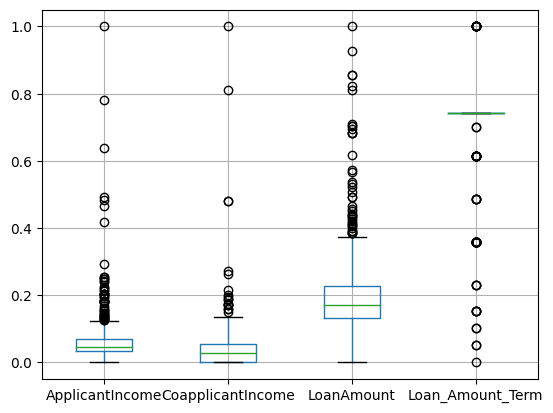

In [33]:
boxplot = train_df_numcols.boxplot(column=['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
# boxplot = train_df_numcols.boxplot(column=list(train_df_numcols.columns))

We can see that many outliers are present in the numerical variables.
Lets get rid of them (I tried with and without outlers and the Accuracy increases in 1% without them)

In [34]:
train_df.shape

(614, 12)

In [35]:
train_df=train_df[(np.abs(stats.zscore(train_df_numcols)) < 2.5).all(axis=1)]
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
train_df_numcols=train_df_numcols[(np.abs(stats.zscore(train_df_numcols)) < 2.5).all(axis=1)]
train_df_numcols.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.000000,0.070489,0.000000,0.186686,0.74359,1.0
1,0.333333,0.054830,0.036192,0.172214,0.74359,1.0
2,0.000000,0.035250,0.000000,0.082489,0.74359,1.0
3,0.000000,0.030093,0.056592,0.160637,0.74359,1.0
4,0.000000,0.072356,0.000000,0.191027,0.74359,1.0


In [37]:
train_df_numcols.shape

(532, 6)

In [38]:
train_df.shape

(532, 12)

In [39]:
train_df_numcols.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.000000,0.070489,0.000000,0.186686,0.74359,1.0
1,0.333333,0.054830,0.036192,0.172214,0.74359,1.0
2,0.000000,0.035250,0.000000,0.082489,0.74359,1.0
3,0.000000,0.030093,0.056592,0.160637,0.74359,1.0
4,0.000000,0.072356,0.000000,0.191027,0.74359,1.0


# Separate LABEL "y"
### Separating Label column ONLY after the outliers are droppped!

In [40]:
# Separate Label in Train DF
y_train_df= train_df.pop('Loan_Status')
# y_train_df.reset_index(drop=True)
# y_train_df.head()

In [41]:
y_train_df.value_counts(ascending=True)

N    163
Y    369
Name: Loan_Status, dtype: int64

The DataSet is **moderately imbalanced.**

In [42]:
y_train_df.shape

(532,)

# Process Categorical Features

In [43]:
# We exclude all numeric columns
train_df_catcol = train_df.select_dtypes(exclude=num_cols)
# test_df_catcol = train_df.select_dtypes(exclude=num_cols)

In [44]:
train_df_catcol.shape

(532, 5)

In [45]:
train_df_catcol.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Urban
1,Male,Yes,Graduate,No,Rural
2,Male,Yes,Graduate,Yes,Urban
3,Male,Yes,Not Graduate,No,Urban
4,Male,No,Graduate,No,Urban


### Imputaton of Categorical Features

In [46]:
train_df_catcol.isna().sum()

Gender           10
Married           3
Education         0
Self_Employed    27
Property_Area     0
dtype: int64

<AxesSubplot:>

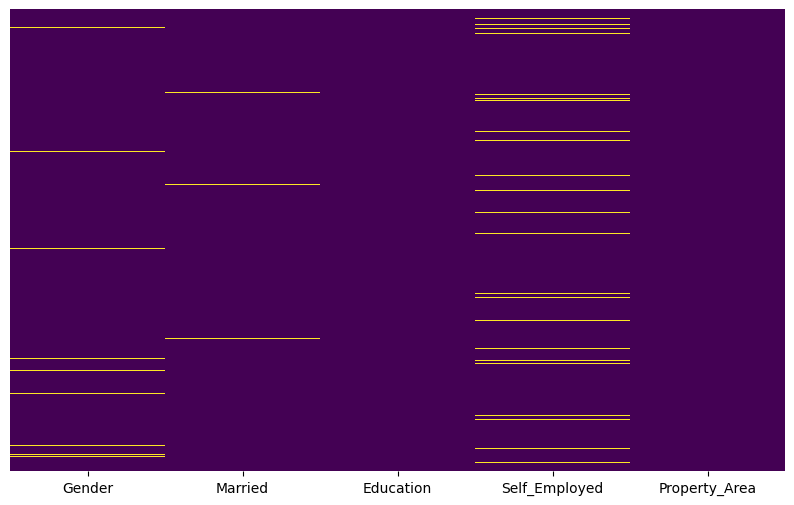

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df_catcol.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [48]:
train_df_catcol[(train_df_catcol['Gender'].isna()) ]

,Gender,Married,Education,Self_Employed,Property_Area
23,NaN,Yes,Not Graduate,No,Rural
188,NaN,Yes,Graduate,Yes,Rural
314,NaN,Yes,Graduate,No,Rural
460,NaN,Yes,Graduate,Yes,Semiurban
467,NaN,Yes,Graduate,No,Semiurban
477,NaN,Yes,Graduate,No,Semiurban
507,NaN,No,Graduate,No,Urban
576,NaN,Yes,Graduate,No,Semiurban
588,NaN,No,Graduate,No,Semiurban
592,NaN,No,Graduate,Yes,Semiurban


In [49]:
numcols = train_df_catcol.columns.tolist()
imputer_mode = SimpleImputer(missing_values=pd.NA, strategy='most_frequent')
train_df_catcol= pd.DataFrame(imputer_mode.fit_transform(train_df_catcol), columns =numcols)

<AxesSubplot:>

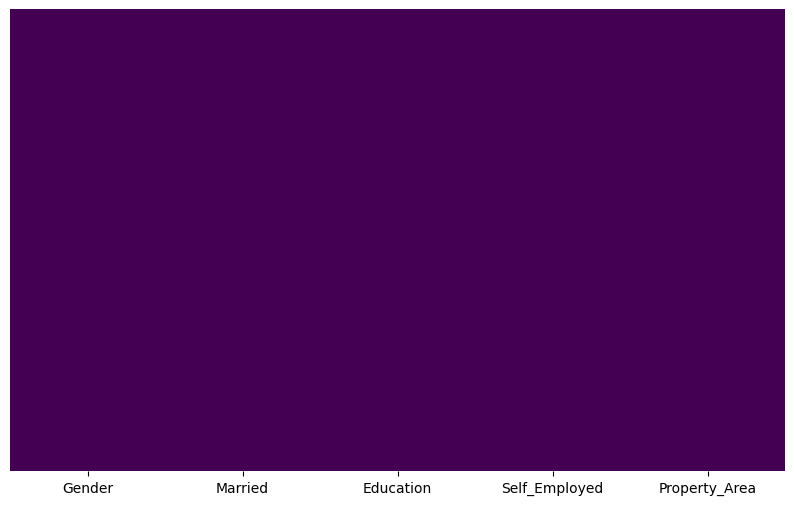

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df_catcol.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [51]:
train_df_catcol.isna().sum()

Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

### One-hot encoding Categorical Features

In [52]:
# Steps to one-hot encoding:
# - We iterate through each categorical column name
# - Create encoded variables for each categorical columns
# - Concatenate the encoded variables column to the data frame
# - Remove the original categorical variable column
for col in train_df_catcol.columns.values:
    one_hot_encoded_variables = pd.get_dummies(train_df_catcol[col], prefix=col, sparse=False)
    train_df_catcol = pd.concat([train_df_catcol, one_hot_encoded_variables], axis=1)
    train_df_catcol.drop([col],axis=1, inplace=True)

In [53]:
train_df_catcol.isna().sum()

Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [54]:
train_df_catcol.shape
# train_df_catcol

(532, 11)

In [55]:
# train_df_catcol['Married'].unique()
# train_df_catcol['Gender'].unique()
# train_df_catcol['Self_Employed'].unique()

In [56]:
train_df_catcol.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1


In [57]:
# check correct imputation applied to one-hot
train_df_catcol[(train_df_catcol['Gender_Female'] == 0) & (train_df_catcol['Gender_Male'] == 0)]

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban


# Join Numerical and Categorical Features
### It is important to re-index the Dataframes to be concatenated aspandas might keep in memory "old indexes" providing unexpected results 

In [58]:
# Concatenate both numeric and one-hot encoded columns in the data frame
train_df_final = pd.concat([train_df_numcols.reset_index(drop=True), 
                            train_df_catcol.reset_index(drop=True)], 
                           axis=1)

# When many transoformations of the data has been performed,
# pandas might keep in memory "old indexes" of the DataFrame and different amount 
# of columns might appear (unexpected results)
# So, it is important to reindex the Dataframes to be concatenated

In [59]:
train_df_final.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.070489,0.000000,0.186686,0.74359,1.0,0,1,1,0,1,0,1,0,0,0,1
1,0.333333,0.054830,0.036192,0.172214,0.74359,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.000000,0.035250,0.000000,0.082489,0.74359,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.000000,0.030093,0.056592,0.160637,0.74359,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.000000,0.072356,0.000000,0.191027,0.74359,1.0,0,1,1,0,1,0,1,0,0,0,1


### Final Sanity check

In [60]:
train_df_final.isna().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [61]:
train_df_final.shape

(532, 17)

# Generate Training and Validation sets 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(train_df_final, 
                                                   y_train_df.reset_index(drop=True), # To get rid of old index in memory
                                                   test_size=0.2, 
                                                   random_state=49)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((425, 17), (107, 17), (425,), (107,))

### Auxiliary function to plot Confusion Matrix

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #if normalize:
     #   cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     #  print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.grid(b=None)  ## added
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Model Definitions:
### GridSearchCV + RandomizedSearchCV
13 different models estimators with grid and random search => 26 models to train

In [64]:
RSEED = 49
# rs = RandomState(RSEED)
cross_validation_splits = 5

In [65]:
KNN_grid_search_parameters = {"n_neighbors": [ 3, 4, 5, 7, 10, 12, 15],
                              "weights": ['uniform', 'distance'],
                              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                              "leaf_size": [15, 30, 45],
                             }

KNN_grid_search_model = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=KNN_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

KNN_random_search_distributions = {
                                   "n_neighbors": np.arange(2, 21),
                                   "weights": ['uniform', 'distance'],
                                   "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                                   "leaf_size": np.arange(5, 51),
                                  }
KNN_random_search_model = RandomizedSearchCV(estimator=KNeighborsClassifier(), 
                                             param_distributions=KNN_random_search_distributions,
                                             scoring='accuracy',
                                             n_jobs=-1,
                                             cv=cross_validation_splits,
                                             verbose=1)

In [66]:
LR_grid_search_parameters = {"penalty": [ 'l1', 'l2', ], # 'none', 'elasticnet'
                             "C": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.75, 1, 1.5],
                             "solver": ['newton-cg', 'lbfgs', 'liblinear'], #'sag', 'saga'],
                             "max_iter": [500],
                             "multi_class": ['auto'],
                             "n_jobs": [-1],
                             "l1_ratio": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
                            }

LR_grid_search_model = GridSearchCV(estimator=LogisticRegression(),
                                param_grid=LR_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)


LR_random_search_distributions = {
                                  "penalty": [ 'l1', 'l2', ], # 'none', 'elasticnet'
                                  "C": np.arange(0., 1, 0.001),
                                  "solver": ['newton-cg', 'lbfgs', 'liblinear'], #'sag', 'saga'],
                                  "max_iter": [500],
                                  "multi_class": ['auto'],
                                  "n_jobs": [-1],
                                  "l1_ratio": np.arange(0, 1, 0.1)
                                 }
LR_random_search_model = RandomizedSearchCV(estimator=LogisticRegression(), 
                                             param_distributions=LR_random_search_distributions,
                                             scoring='accuracy',
                                             n_jobs=-1,
                                             cv=cross_validation_splits,
                                             verbose=1)

In [67]:
DT_grid_search_parameters = {"criterion": [ 'gini', 'entropy', 'log_loss'],
                             "splitter": ['best', 'random'],
                             "max_depth": [None, 2, 4, 6],
                             "min_samples_split": [2,5, 10, 15, 20, 30, 50],
                             "random_state": [RSEED]
                            }
DT_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(),
                                param_grid=DT_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

DT_random_search_distributions = {
                                   "criterion": [ 'gini', 'entropy', 'log_loss'],
                                   "max_depth": list(np.arange(0,21)),
                                   "max_features": ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
                                   "max_leaf_nodes": list(np.arange(5,51)),
                                   "min_samples_split": list(np.arange(2,51)),
                                   "random_state": [RSEED]
                                  }

DT_random_search_model = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                param_distributions=DT_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [68]:
RF_grid_search_parameters = {"criterion": [ 'gini', 'entropy', 'log_loss'],
                             "n_estimators": [20, 50, 100],
                             "max_depth": [None, 2, 4, 6],
                             "min_samples_split": [2,5, 10, 15, 20, 30, 50],
                             "random_state": [RSEED]
                            }
RF_grid_search_model = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=RF_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

RF_random_search_distributions = {
                                   "criterion": [ 'gini', 'entropy', 'log_loss'],
                                   "n_estimators": list(np.arange(5,250)),
                                   "max_depth": list(np.arange(0,21)),
#                                    "max_features": ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
#                                    "max_leaf_nodes": list(np.arange(5,51)),
                                   "min_samples_split": list(np.arange(2,101)),
                                   "random_state": [RSEED]
                                  }

RF_random_search_model = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions=RF_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [69]:
SGD_grid_search_parameters = {"loss": [ 'hinge', 
                                       'log_loss', 
                                       'log', 
                                       'modified_huber', 
                                       'squared_hinge', 
                                       'perceptron', 
                                       'squared_error', 
                                       'huber', 
                                       'epsilon_insensitive', 
                                       'squared_epsilon_insensitive'],
                              "penalty": ['l1', 'l2'],
                              "alpha": [0, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1],
                              "random_state": [RSEED]
                             }

SGD_grid_search_model = GridSearchCV(estimator=SGDClassifier(),
                                param_grid=SGD_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

SGD_random_search_distributions = {
                                   "loss": [ 'hinge', 
                                             'log_loss', 
                                             'log', 
                                             'modified_huber', 
                                             'squared_hinge', 
                                             'perceptron', 
                                             'squared_error', 
                                             'huber', 
                                             'epsilon_insensitive', 
                                             'squared_epsilon_insensitive'],
                                   "penalty": ['l1', 'l2'],
                                   "alpha": np.arange(0,1, 0.001),
                                   "random_state": [RSEED]
                                  }

SGD_random_search_model = RandomizedSearchCV(estimator=SGDClassifier(),
                                param_distributions=SGD_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [70]:
SVC_grid_search_parameters = {"C": [ 0, 0.01, 0.1, 0.5, 0.75, 1, 2],
                              "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                              "gamma": ['scale', 'auto'],
                              "shrinking": [True, False],
                              "random_state": [RSEED]
                             }

SVC_grid_search_model = GridSearchCV(estimator=SVC(),
                                param_grid=SVC_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

SVC_random_search_distributions = {
                                   "C": np.arange(0,2, 0.1),
                                   "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                                   "gamma": ['scale', 'auto'],
                                   "shrinking": [True, False],
                                   "random_state": [RSEED]
                                  }
                                  
SVC_random_search_model = RandomizedSearchCV(estimator=SVC(),
                                param_distributions=SVC_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [71]:
NB_grid_search_parameters = {"var_smoothing": [ 1e-9, 1e-8],
                            }

NB_grid_search_model = GridSearchCV(estimator=GaussianNB(),
                                param_grid=NB_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

NB_random_search_distributions = {
                                   "var_smoothing": np.arange(0,1e-8,1e-9)
                                  }

NB_random_search_model = RandomizedSearchCV(estimator=GaussianNB(),
                                param_distributions=NB_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [72]:
# Quadratic Discriminant Analysis

QDA_grid_search_parameters = {"reg_param": [ 0, 0.01, 0.1],
                            }

QDA_grid_search_model = GridSearchCV(estimator=QuadraticDiscriminantAnalysis(),
                                param_grid=QDA_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

QDA_random_search_distributions = {
                                   "reg_param": np.arange(0,0.5,0.01)
                                  }

QDA_random_search_model = RandomizedSearchCV(estimator=QuadraticDiscriminantAnalysis(),
                                param_distributions=QDA_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [73]:
# AdaBoostClassifier
# algorithm{‘SAMME’, ‘SAMME.R’}

ADA_grid_search_parameters = {"learning_rate":[0.1, 0.25, 0.5, 1],
                              "n_estimators":[50, 100, 150, 200, 250],
                              "algorithm": ['SAMME', 'SAMME.R'],
                              "random_state": [RSEED],
                             }

ADA_grid_search_model = GridSearchCV(estimator=AdaBoostClassifier(),
                                param_grid=ADA_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

ADA_random_search_distributions = {
                                   "learning_rate":np.arange(0, 1, 0.05),
                                   "n_estimators":np.arange(50, 300),
                                   "algorithm": ['SAMME', 'SAMME.R'],
                                   "random_state": [RSEED],
                                  }
                                  
ADA_random_search_model = RandomizedSearchCV(estimator=AdaBoostClassifier(),
                                param_distributions=ADA_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [74]:
# xgb.config_context(verbosity=2)
XGB_grid_search_parameters = {"eta":[0.3],
                              "max_depth":[1, 2],
                              "subsample":[0.3, 1],
                              "gamma":[0, 0.2],
                              "sampling_method":['uniform', 'subsample'],
                              "lambda": [ 0, 0.5], # L2
                              "alpha":[0, 0.5],    # L1
                              #"tree_method": ['approx', 'hist', 'gpu_hist'],
                              "refresh_leaf": [0, 1],
                              "min_child_weight":[0.5, 1],
                              "max_bin":[256],
                              "num_parallel_tree": [1, 2],
                              "verbosity":[1]
                             }

XGB_grid_search_model = GridSearchCV(estimator=XGBClassifier(),
                                param_grid=XGB_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

XGB_random_search_distributions = {
                                   "eta": np.arange(0.,0.5, 0.1),
                                   "max_depth":[1],
                                   "subsample":[0.3],
                                   "gamma":np.arange(0., 0.6, 0.1),
                                   "sampling_method":['uniform'],
                                   "lambda": np.arange(0., 0.5, 0.1),   # L2
                                   "alpha":np.arange(0.4, 0.7, 0.1),    # L1
                                   #"tree_method": ['approx', 'hist', 'gpu_hist'],
                                   "refresh_leaf": [1],
                                   "min_child_weight":np.arange(0.3, 0.5, 0.1),
                                   "max_bin":[256],
                                   "num_parallel_tree": [1],
                                   # "objective": ['multi:softmax'],
                                   "verbosity":[1]
                                  }

XGB_random_search_model = RandomizedSearchCV(estimator=XGBClassifier(),
                                param_distributions=XGB_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [75]:
# Histogram Gradient Boosting 

HGBC_grid_search_parameters = {                                   
                               "loss": ['auto'],
                               "learning_rate": [0.01, 0.05, 0.1, 0.5],
                               "max_iter": [50, 100],
                               "max_depth": [None, 100],
                               "l2_regularization": [0, 0.2, 1],
                               "max_bins": [255],
                               "random_state": [RSEED],
                             }

HGBC_grid_search_model = GridSearchCV(estimator=HistGradientBoostingClassifier(),
                                param_grid=HGBC_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

HGBC_random_search_distributions = {
                                   "loss": ['log_loss', 'auto', 'binary_crossentropy', 'categorical_crossentropy'],
                                   "learning_rate": np.arange(0, 1, 0.01),
#                                    "max_iter": np.arange(50, 101),
                                   "max_depth": np.arange(0, 100),
                                   "l2_regularization": np.arange(0, 2, 0.001),
#                                    "max_bins": np.arange(50, 256),
                                   "random_state": [RSEED],
                                  }
                                  
HGBC_random_search_model = RandomizedSearchCV(estimator=HistGradientBoostingClassifier(),
                                param_distributions=HGBC_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [76]:
# Light Gradient Boosting Model Classifier

LGBMC_grid_search_parameters = {            
                                "boosting_type":['gbdt', 'dart', 'goss', 'rf'],
                                "num_leaves": [31, 20, 40], 
                                "max_depth":[-1,5, 10], 
                                "learning_rate":[0.01], 
                                "n_estimators":[50,100,150],
                                "reg_alpha": [0.0, 0.25],  # L1
                                "reg_lambda": [0.0, 0.01], # L2
                                "random_state": [RSEED], 
                                "n_jobs": [-1],
                               }
    
LGBMC_grid_search_model = GridSearchCV(estimator=LGBMClassifier(),
                                param_grid=LGBMC_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

LGBMC_random_search_distributions = {
#                                      "boosting_type":['gbdt', 'dart', 'goss', 'rf'],
                                     "num_leaves": np.arange(10,40), 
                                     "max_depth":np.arange(-1,30), 
#                                      "learning_rate":np.arange(0,0.5,0.001), 
#                                      "n_estimators":[50,100,150],
                                     "reg_alpha": np.arange(0,1,0.001),  # L1
                                     "reg_lambda": np.arange(0,1,0.001), # L2
                                     "random_state": [RSEED], 
                                     "n_jobs": [-1],
                                  }
                                  
LGBMC_random_search_model = RandomizedSearchCV(estimator=LGBMClassifier(),
                                param_distributions=LGBMC_random_search_distributions,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

In [77]:
# Multi-layer Perceptron Classifier

MLPC_grid_search_parameters = {            
                                "hidden_layer_sizes":[(100,),(50, 2),(50,3) ], 
                                "activation":['relu', 'tanh'], 
                                "solver":['adam', 'lbfgs','sgd'], 
                                "alpha":[0.0001, 0.01],  # L2
                                "batch_size":['auto'], 
                                "learning_rate":['constant', 'invscaling', 'adaptive'], 
                                "learning_rate_init":[0.001], 
                                "power_t":[0.5], 
                                "max_iter":[200], 
                                "random_state":[RSEED],
                               }
    
MLPC_grid_search_model = GridSearchCV(estimator=MLPClassifier(),
                                param_grid=MLPC_grid_search_parameters,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=cross_validation_splits,
                                verbose=1)

MLPC_random_search_distributions = {
                                "hidden_layer_sizes":[(50,3), (50,4) ], 
                                "activation":['relu', 'tanh'], 
                                "solver":['adam', 'sgd'], 
                                "alpha":np.arange(0, 1, 0.01),  # L2
                                "batch_size":[50, 100, 200], 
                                "learning_rate":['adaptive'], 
                                "learning_rate_init":[0.001], 
                                "power_t":[0.5], 
                                "max_iter":np.arange(300, 1000), 
                                "random_state":[RSEED],
                                  }
                                  
MLPC_random_search_model = RandomizedSearchCV(estimator=MLPClassifier(),
                                param_distributions=MLPC_random_search_distributions,
                                scoring='accuracy',
                                n_iter=10,
                                n_jobs=-1,
#                                 cv=cross_validation_splits,
                                verbose=1)

In [78]:
models = {"DT grid_search":      [ DT_grid_search_model ], 
          "DT random_search":    [ DT_random_search_model ],
          "KNN grid_search":     [ KNN_grid_search_model ], 
          "KNN random_search":   [ KNN_random_search_model ],
          "LR grid_search":      [ LR_grid_search_model ], 
          "LR random_search":    [ LR_random_search_model ],
          "SVC grid_search":     [ SVC_grid_search_model ],
          "SVC random_search":   [ SVC_random_search_model ],
          "RF grid_search":      [ RF_grid_search_model ],
          "RF random_search":    [ RF_random_search_model ],
          "SGD grid_search":     [ SGD_grid_search_model ],
          "SGD random_search":   [ SGD_random_search_model],
          "NB grid_search":      [ NB_grid_search_model],
          "NB random_search":    [ NB_random_search_model],
          "QDA grid_search":     [ QDA_grid_search_model],
          "QDA random_search":   [ QDA_random_search_model],
          "ADA grid_search":     [ ADA_grid_search_model ],
          "ADA random_search":   [ ADA_random_search_model ],
          "XGB grid_search":     [ XGB_grid_search_model ],
          "XGB random_search":   [ XGB_random_search_model ],
          "HGBC grid_search":    [ HGBC_grid_search_model ],
          "HGBC random_search":  [ HGBC_random_search_model ],
          "LGBMC grid_search":   [ LGBMC_grid_search_model ],
          "LGBMC random_search": [ LGBMC_random_search_model ],
          "MLPC grid_search" :   [ MLPC_grid_search_model ],
          "MLPC random_search" : [ MLPC_random_search_model ],
         }

In [79]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
 }

<IPython.core.display.Javascript object>

In [80]:
pd.options.display.max_rows = None

# Models Processing

In [81]:
%%time
results_dict={}
comparison_matrix = pd.DataFrame(columns=['Model', 
                                          'Training_Accuracy', 
                                          'Testing_Accuracy', 
                                          'Best_Parameters'])

print("[+] Processing {} models. Please, wait...".format(len(models)))

for model in models:
    print("Algorithm being processed: {}".format(model))
    models[model][0] = models[model][0].fit(X_train, y_train)
    # print(results_dict)
    series_aux =pd.Series(data=[model, 
                                models[model][0].best_score_,
                                accuracy_score(y_test, models[model][0].best_estimator_.predict(X_test)),
                                models[model][0].best_params_], 
                          index=comparison_matrix.columns)
    comparison_matrix = comparison_matrix.append(series_aux, ignore_index=True)

print("[+] Finish Processing\n") 

[+] Processing 26 models. Please, wait...
Algorithm being processed: DT grid_search
Fitting 5 folds for each of 168 candidates, totalling 840 fits
Algorithm being processed: DT random_search
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Algorithm being processed: KNN grid_search
Fitting 5 folds for each of 168 candidates, totalling 840 fits
Algorithm being processed: KNN random_search
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Algorithm being processed: LR grid_search
Fitting 5 folds for each of 594 candidates, totalling 2970 fits
Algorithm being processed: LR random_search
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Algorithm being processed: SVC grid_search
Fitting 5 folds for each of 112 candidates, totalling 560 fits
Algorithm being processed: SVC random_search
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Algorithm being processed: RF grid_search
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Algorit

### Calculating Accuracy in Testing DataSet for the best model (which was tuned using training DataSet)

In [82]:
comparison_matrix = comparison_matrix.sort_values(['Training_Accuracy'], ascending=False, ignore_index=True)
comparison_matrix.iat[0, 0]
# comparison_matrix['Model'].iloc[0]

'RF grid_search'

In [83]:
# comparison_matrix

In [84]:
best_model = models[comparison_matrix.iat[0, 0]][0].best_estimator_
best_model

RandomForestClassifier(min_samples_split=30, random_state=49)

In [85]:
best_predictions =  best_model.predict(X_test)

In [86]:
# pd.DataFrame(best_predictions).value_counts(ascending=True)
# y_val.value_counts(ascending=True)

### Confusion Matrix (Testing Data)

Accuracy in Testing Set is 0.8504672897196262
TN: 17  FP: 15  FN: 1  TP: 74


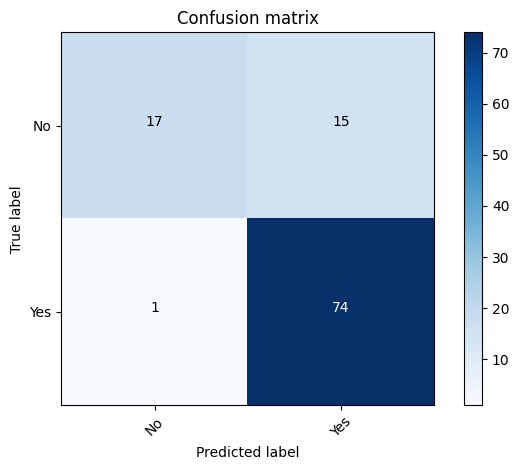

In [87]:
target_names = [ 'No', 'Yes']

acc = accuracy_score(y_test, best_predictions)
print("Accuracy in Testing Set is", acc)

tn, fp, fn, tp = confusion_matrix(y_test, best_predictions).ravel()
print("TN:",tn, " FP:",fp, " FN:",fn, " TP:",tp)

cm = confusion_matrix(y_test, best_predictions)
# plt.grid(b=None)
plt.figure()
plt.grid(b=None)
plot_confusion_matrix(cm, classes=target_names, normalize=False)
plt.show()

### As we can see the best model decreases the accuracy a little when pedicting samples that it has never seen before
### Actually, with the Testing Data other models perform a little bit better.

# Table 1 (Algorithm wise best model with best hyperparameter)

In [88]:
pd.options.display.max_rows = None
table1 = comparison_matrix.sort_values(['Training_Accuracy'], ascending=False, ignore_index=True)

In [89]:
table1

,Model,Training_Accuracy,Testing_Accuracy,Best_Parameters
0,RF grid_search,0.814118,0.850467,"{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 30, 'n_estimators': 100, 'random_state': 49}"
1,RF random_search,0.814118,0.850467,"{'random_state': 49, 'n_estimators': 221, 'min_samples_split': 32, 'max_depth': 15, 'criterion': 'entropy'}"
2,DT grid_search,0.811765,0.850467,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'random_state': 49, 'splitter': 'best'}"
3,ADA grid_search,0.811765,0.850467,"{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 49}"
4,SVC grid_search,0.811765,0.850467,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 49, 'shrinking': True}"
5,SVC random_search,0.811765,0.850467,"{'shrinking': False, 'random_state': 49, 'kernel': 'linear', 'gamma': 'scale', 'C': 1.8}"
6,SGD grid_search,0.811765,0.850467,"{'alpha': 0.0001, 'loss': 'huber', 'penalty': 'l1', 'random_state': 49}"
7,HGBC grid_search,0.811765,0.850467,"{'l2_regularization': 0, 'learning_rate': 0.01, 'loss': 'auto', 'max_bins': 255, 'max_depth': None, 'max_iter': 100, 'random_state': 49}"
8,DT random_search,0.811765,0.850467,"{'random_state': 49, 'min_samples_split': 13, 'max_leaf_nodes': 10, 'max_features': None, 'max_depth': 1, 'criterion': 'gini'}"
9,LGBMC random_search,0.809412,0.859813,"{'reg_lambda': 0.247, 'reg_alpha': 0.391, 'random_state': 49, 'num_leaves': 32, 'n_jobs': -1, 'max_depth': 1}"


In [90]:
table1.to_csv('task10_table1.csv', index=False)

# Table 2 (Best overall)

In [91]:
table2 = comparison_matrix.sort_values(['Training_Accuracy'], ascending=False, ignore_index=True).head(1)

In [92]:
table2

,Model,Training_Accuracy,Testing_Accuracy,Best_Parameters
0,RF grid_search,0.814118,0.850467,"{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 30, 'n_estimators': 100, 'random_state': 49}"


In [93]:
table2.to_csv('task10_table2.csv', index=False)